<center> <h1> MÍNIMOS QUADRADOS RECURSIVOS SOBRE SÉRIES TEMPORAIS </h1> </center>
    

<font size=3>Vamos gerar algumas variáveis aleatórias distribuídas normalmente, uma variável categórica binária e um erro normalmente distribuído para servir de banco de dados para nossa regressão. </font>

In [304]:
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import numpy as np

N = 300

v = (0.01)*sp.random.normal(size=N) # Processo aleatório gaussiano para gerar ruído
v

array([ 1.76271889e-02,  1.08964328e-02,  3.29412922e-03, -6.83418416e-03,
       -4.15975546e-04,  7.00842386e-03,  2.47954206e-03,  1.45424335e-02,
        4.58791860e-03, -1.95778252e-03,  1.14545441e-02,  2.86284515e-03,
        4.10360297e-03, -7.36680465e-03,  2.91987702e-03, -9.00604520e-03,
        8.98886789e-03, -5.93437418e-03,  1.05273805e-02, -1.34859306e-02,
        4.62813746e-03, -7.30785355e-03,  6.72127510e-03,  1.03653570e-02,
        7.71195858e-03, -1.47589050e-02,  4.43215723e-03,  2.71171192e-03,
       -1.56520299e-02,  7.59231444e-03, -6.37164594e-03,  1.48816032e-02,
       -2.00496357e-03,  5.80955987e-03,  1.75138164e-02,  1.21971357e-02,
        9.77189337e-03, -2.70832830e-04,  1.48291063e-02, -1.02409765e-02,
        2.20802971e-03,  1.34519793e-02, -6.73968340e-03,  4.35548318e-03,
       -1.06804328e-02, -9.91516517e-04, -1.87538589e-03,  5.20215091e-03,
       -7.40838349e-03, -7.68795810e-03,  1.03057749e-02, -1.36494715e-02,
        6.32183655e-03,  

In [305]:
e = np.zeros((N,1))  #Série de ruído contaminante
e

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [306]:
x = sp.random.normal(size=N) #Série de entrada
x

array([-0.6586705 , -0.54390345,  2.48663515,  1.05778816,  0.28946662,
       -0.1844106 , -1.25822196, -0.12354447,  0.24089097,  1.26201867,
       -0.18370957,  1.70809786, -0.10759517, -1.40634469,  0.23072718,
        0.71821869,  0.71733305,  0.1666089 ,  0.69508941,  0.58543662,
       -1.02080902, -1.91205983,  0.93820019,  1.46858538,  0.37662694,
       -0.4684281 , -1.13540148, -0.7660445 , -0.05015665,  0.5370976 ,
        0.82385826,  0.24674   ,  0.52342263, -0.53146117,  1.07906949,
       -0.09974888,  0.33832992,  1.54295662, -0.38390245,  0.33642184,
        1.55312518,  0.89150254, -0.59343923,  0.1132797 ,  0.27711325,
       -0.52293097,  0.77004427,  0.16196904,  1.10977977,  1.93330847,
       -1.48032275, -0.24508711, -1.66681615, -0.15390177, -0.20731135,
        0.28395395,  0.38585834, -1.7561726 ,  1.35448744,  0.41231199,
       -0.04472274, -0.04135158,  0.47367664,  0.86874358, -0.05385327,
        1.81537005,  1.09264801, -0.17410272, -3.00005544, -1.04

In [307]:
y = np.zeros((N,1)) #Série de saída
y

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [308]:
P = 1e4*np.eye(2) #Matriz de covari�ncia inicial
P

array([[10000.,     0.],
       [    0., 10000.]])

In [309]:
theta = np.zeros((2,1)) #ganhos de correção
theta

array([[0.],
       [0.]])

In [310]:
THETA = np.zeros((N,2)) #Registro das estimativas
THETA

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.

In [311]:
k = np.zeros((2,1)) #ganhos de correção
k

array([[0.],
       [0.]])

In [312]:
K = np.zeros((N,2)) #registro dos ganhos
K

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.

In [313]:
sigma = np.zeros((N,2))
sigma[0, :] = np.diagonal(P).T; #Variancias
sigma

array([[10000., 10000.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],


In [314]:
labda = .95   #fator de esquecimento

In [315]:
sigma.setflags(write=1)

In [316]:
for t in range(1,N):
    # Estimador de MQ recursivo
    phi = np.array([[y[t-1]], [x[t-1]]]) # Regressores
    k= P*phi/(phi.T*P*phi+labda) #Atualização dos ganhos
    theta = theta + k*(y[t]-phi.T*theta) #Atualização dos parâmetros
    P = (P - P*phi*phi.T*P/(phi.T*P*phi+labda))/labda   #Atualização da matriz de covariancia
    k = np.diagonal(k)
    theta = np.diagonal(theta)
    sigma[t, :] =  np.diagonal(P).T #Armazena as variancias
    THETA[t,:] = theta.T  # Armazena os parametros
    K[t,:] = k.T #Armazena os ganhos

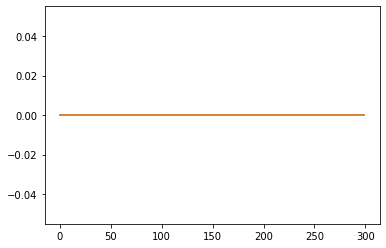

In [321]:
plt.plot(THETA)